In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Evaluvating
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,RocCurveDisplay,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score

In [ ]:
from sklearn.svm import SVC

In [ ]:
features=pd.read_csv('/content/drive/MyDrive/feature_100_true.csv')

In [ ]:
features

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,Link,lable,l1,l2,l3,l4,l5,l6,l7,l8
0,28.944342,1106.960000,5,0.000000,/content/drive/MyDrive/data/Normal/dysgraphia_...,no,-1.111134,2.815558,-1.963040,-0.453976,-0.714596,5.369467,-1.070979,-1.788626
1,43.559691,617.000000,5,0.000000,/content/drive/MyDrive/data/Normal/dysgraphia_...,no,-1.082647,3.269634,-1.901758,-0.508880,-0.687258,5.052329,-1.058053,-1.636201
2,87.790334,2186.500000,5,1363.664609,/content/drive/MyDrive/data/Normal/dysgraphia_...,no,-1.183598,2.349073,-2.086748,-0.382516,-0.695264,6.111055,-1.161153,-2.142544
3,86.561794,602.000000,-5,0.000000,/content/drive/MyDrive/data/Normal/dysgraphia_...,no,-1.097709,3.170597,-1.899564,-0.520904,-0.703620,5.084200,-1.051114,-1.654392
4,61.942587,701.352041,-5,0.000000,/content/drive/MyDrive/data/Normal/dysgraphia_...,no,-1.269350,2.046691,-2.122050,-0.381242,-0.751105,6.334366,-1.142994,-2.280844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,308.400209,210.000000,5,23.482151,/content/drive/MyDrive/data/Dysgraphia/dysgrap...,yes,-2.470516,11.562148,2.190010,-1.462264,-2.349383,-0.382875,-0.764947,14.053461
202,549.311920,160.000000,5,97.446474,/content/drive/MyDrive/data/Dysgraphia/dysgrap...,yes,-2.504734,11.576081,1.995893,-1.411055,-2.212195,-0.285212,-0.695404,13.706995
203,12.188425,32473.760000,5,0.000000,/content/drive/MyDrive/data/Dysgraphia/dysgrap...,yes,-2.210393,9.209371,0.707892,-0.966253,-1.476118,-0.128085,-0.404649,7.830327
204,0.086254,899.000000,5,0.000000,/content/drive/MyDrive/data/Dysgraphia/dysgrap...,yes,-2.233008,10.107451,1.766552,-1.166585,-2.060947,-0.289563,-0.524454,11.425462


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pen Pressure    206 non-null    float64
 1   Line Spacing    206 non-null    float64
 2   Slant Angle     206 non-null    int64  
 3   Baseline angle  206 non-null    float64
 4   Link            206 non-null    object 
 5   lable           206 non-null    object 
 6   l1              206 non-null    float64
 7   l2              206 non-null    float64
 8   l3              206 non-null    float64
 9   l4              206 non-null    float64
 10  l5              206 non-null    float64
 11  l6              206 non-null    float64
 12  l7              206 non-null    float64
 13  l8              206 non-null    float64
dtypes: float64(11), int64(1), object(2)
memory usage: 22.7+ KB


In [ ]:
labels=features['lable']
features.drop(['Link','lable'],axis=1,inplace=True)

In [ ]:
features

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,l1,l2,l3,l4,l5,l6,l7,l8
0,28.944342,1106.960000,5,0.000000,-1.111134,2.815558,-1.963040,-0.453976,-0.714596,5.369467,-1.070979,-1.788626
1,43.559691,617.000000,5,0.000000,-1.082647,3.269634,-1.901758,-0.508880,-0.687258,5.052329,-1.058053,-1.636201
2,87.790334,2186.500000,5,1363.664609,-1.183598,2.349073,-2.086748,-0.382516,-0.695264,6.111055,-1.161153,-2.142544
3,86.561794,602.000000,-5,0.000000,-1.097709,3.170597,-1.899564,-0.520904,-0.703620,5.084200,-1.051114,-1.654392
4,61.942587,701.352041,-5,0.000000,-1.269350,2.046691,-2.122050,-0.381242,-0.751105,6.334366,-1.142994,-2.280844
...,...,...,...,...,...,...,...,...,...,...,...,...
201,308.400209,210.000000,5,23.482151,-2.470516,11.562148,2.190010,-1.462264,-2.349383,-0.382875,-0.764947,14.053461
202,549.311920,160.000000,5,97.446474,-2.504734,11.576081,1.995893,-1.411055,-2.212195,-0.285212,-0.695404,13.706995
203,12.188425,32473.760000,5,0.000000,-2.210393,9.209371,0.707892,-0.966253,-1.476118,-0.128085,-0.404649,7.830327
204,0.086254,899.000000,5,0.000000,-2.233008,10.107451,1.766552,-1.166585,-2.060947,-0.289563,-0.524454,11.425462


[Text(0.5, 0, 'Pen Pressure'), Text(0, 0.5, 'Baseline angle')]

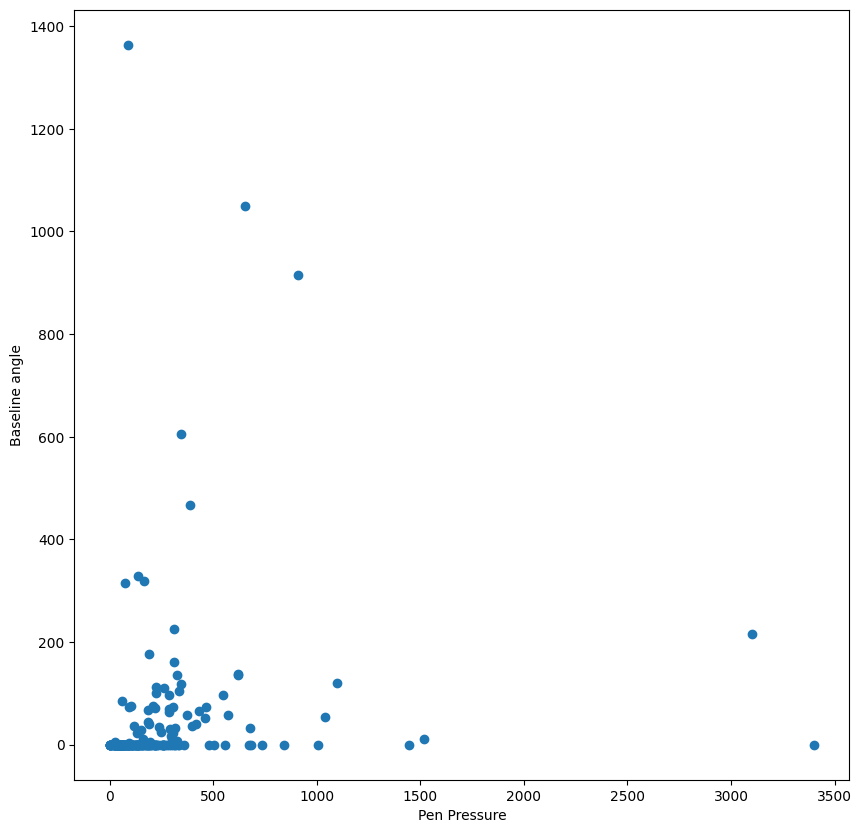

In [ ]:
ig,ax=plt.subplots(figsize=(10,10))
mp=ax.scatter(features['Pen Pressure'],features['Baseline angle'])
#mp=ax.scatter(dk.age[dk.cp==0],dk.trestbps[dk.cp==0])
ax.legend
ax.set(xlabel="Pen Pressure",ylabel="Baseline angle")



[Text(0.5, 0, 'Slant angle'), Text(0, 0.5, 'Baseline angle')]

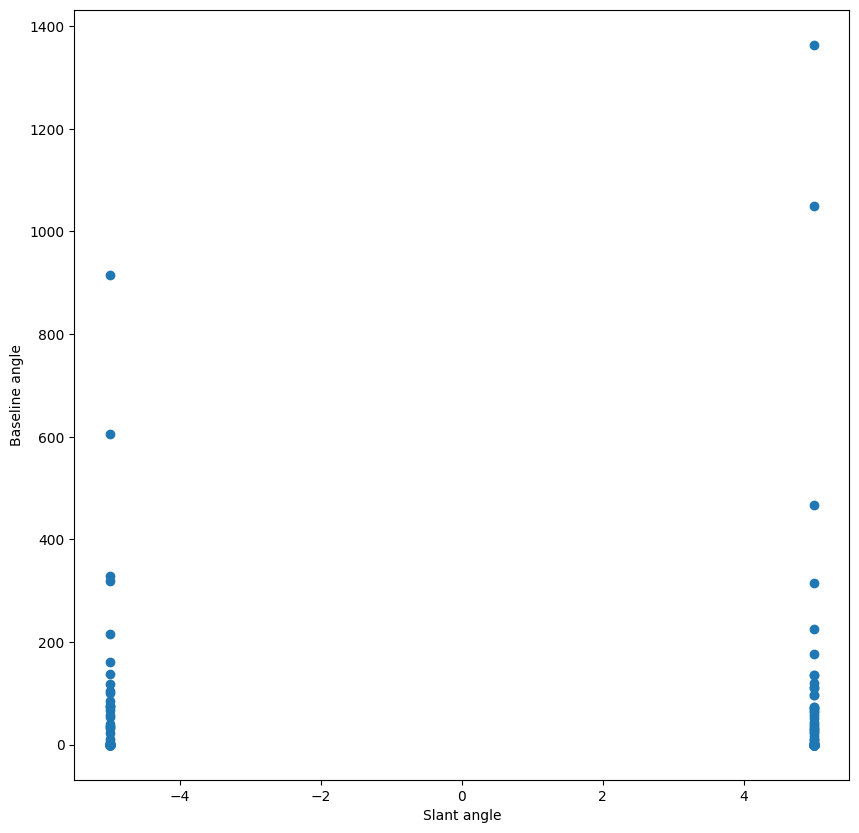

In [ ]:
ig,ax=plt.subplots(figsize=(10,10))
mp=ax.scatter(features['Slant Angle'],features['Baseline angle'])

ax.legend
ax.set(xlabel="Slant angle",ylabel="Baseline angle")

In [ ]:
features.corr()

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,l1,l2,l3,l4,l5,l6,l7,l8
Pen Pressure,1.000000,-0.100115,-0.037254,0.160411,-0.379614,0.377653,0.383667,-0.369911,-0.378088,-0.341454,0.153182,0.392611
Line Spacing,-0.100115,1.000000,-0.035870,-0.037531,0.022608,-0.005197,-0.024523,0.021722,0.032742,-0.016334,0.069362,-0.019801
Slant Angle,-0.037254,-0.035870,1.000000,-0.011291,-0.113088,0.092449,0.097602,-0.101527,-0.103165,-0.099271,0.071761,0.090370
Baseline angle,0.160411,-0.037531,-0.011291,1.000000,-0.255012,0.266503,0.272545,-0.257733,-0.269727,-0.258501,0.156522,0.281102
l1,-0.379614,0.022608,-0.113088,-0.255012,1.000000,-0.916508,-0.950642,0.924590,0.978108,0.803957,-0.275674,-0.954165
l2,0.377653,-0.005197,0.092449,0.266503,-0.916508,1.000000,0.987263,-0.992311,-0.955408,-0.963850,0.559618,0.986866
l3,0.383667,-0.024523,0.097602,0.272545,-0.950642,0.987263,1.000000,-0.988496,-0.982620,-0.925208,0.463418,0.996159
l4,-0.369911,0.021722,-0.101527,-0.257733,0.924590,-0.992311,-0.988496,1.000000,0.964952,0.942864,-0.498247,-0.986078
l5,-0.378088,0.032742,-0.103165,-0.269727,0.978108,-0.955408,-0.982620,0.964952,1.000000,0.863321,-0.345627,-0.987269
l6,-0.341454,-0.016334,-0.099271,-0.258501,0.803957,-0.963850,-0.925208,0.942864,0.863321,1.000000,-0.748459,-0.920438


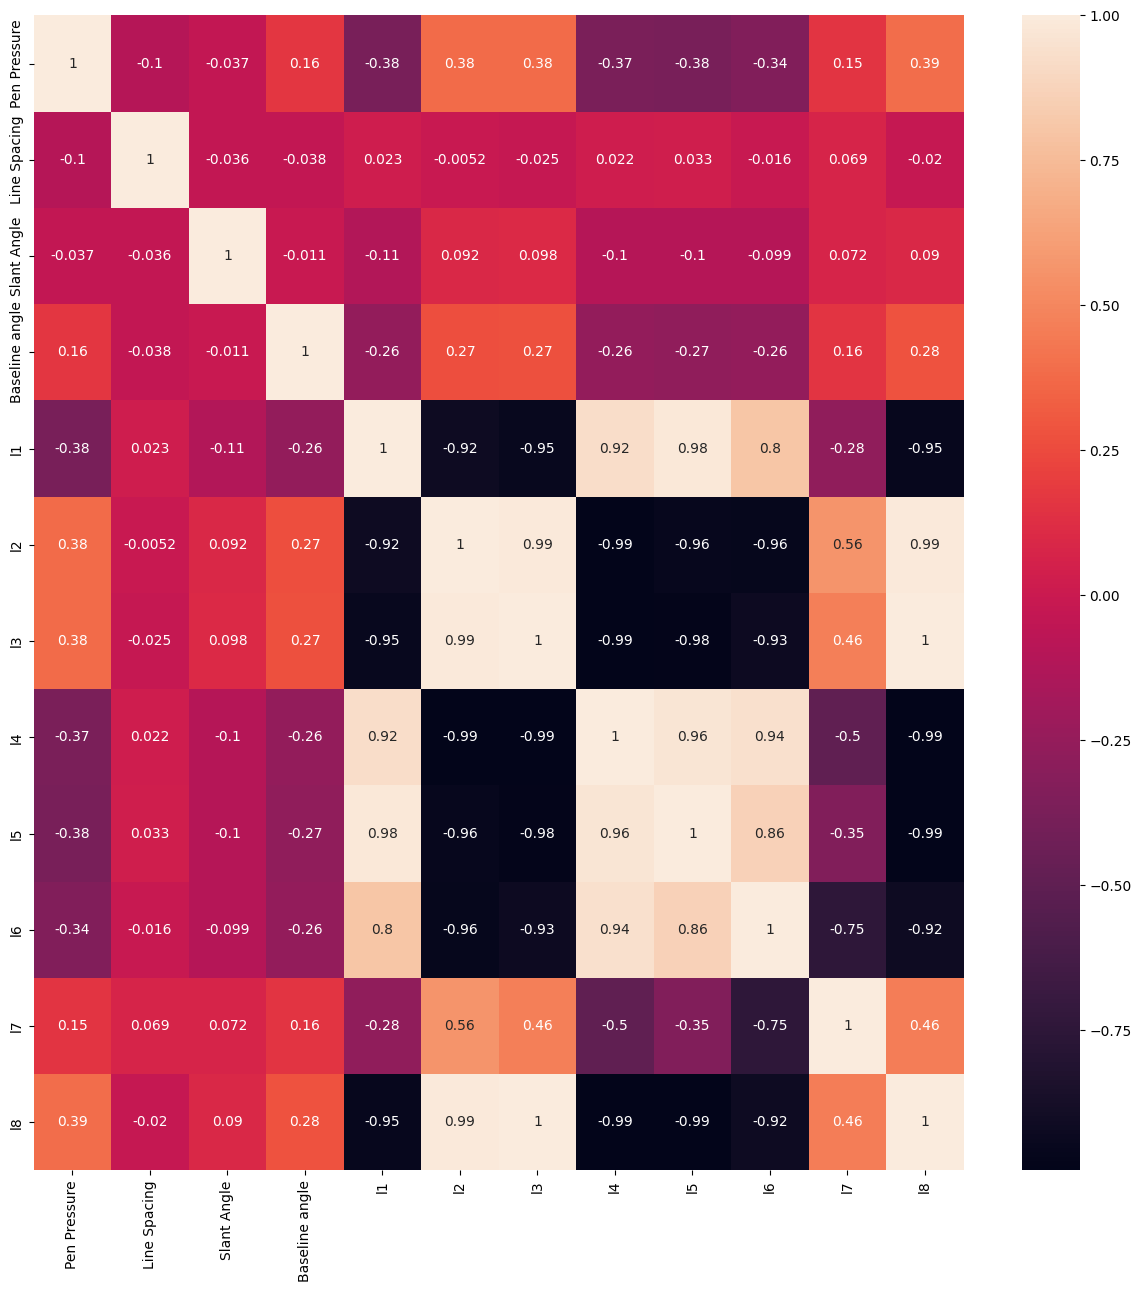

In [ ]:
fig,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(data=features.corr(),annot=True)

In [ ]:
def mdlscr(model,x_tr,x_t,y_tr,y_t):
     model.fit(x_tr,y_tr)
     print(model.score(x_t,y_t))
     return model

In [ ]:
ans={}
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(features,labels,train_size=0.9)
print("random forest classifier")
ans["RandomForestClassifier"]=mdlscr(RandomForestClassifier(),x_train,x_test,y_train,y_test)
print("Logistic Regression")
ans["LogisticRegression"]=mdlscr(LogisticRegression(),x_train,x_test,y_train,y_test)
print("kNeighbour")
ans["kNeighbour"]=mdlscr(KNeighborsClassifier(),x_train,x_test,y_train,y_test)
print("Decision Tree")
ans["dtree"]=mdlscr(DecisionTreeClassifier(min_weight_fraction_leaf=0.2),x_train,x_test,y_train,y_test)

random forest classifier
0.9523809523809523
Logistic Regression
0.8571428571428571
kNeighbour
0.8571428571428571
Decision Tree
0.8571428571428571


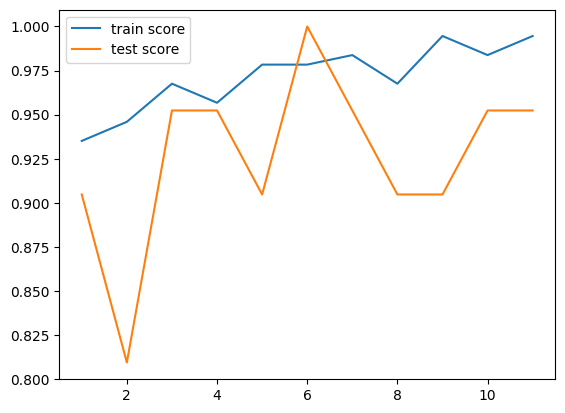

In [ ]:
b_model=RandomForestClassifier()
train_score=[]
test_score=[]
n_estimators=range(1,12)
for i in n_estimators:
    b_model.set_params(n_estimators=i)
    b_model.fit(x_train,y_train)
    train_score.append(b_model.score(x_train,y_train))
    test_score.append(b_model.score(x_test,y_test))
plt.plot(n_estimators,train_score,label="train score")
plt.plot(n_estimators,test_score,label="test score")
# plt.xlabel("n_estimators")
# plt.ylabel("score")
plt.legend()


In [ ]:
def evaluvate(model,x,y):
    y_predict=model.predict(x)
    print(classification_report(y,y_predict))
    ConfusionMatrixDisplay.from_predictions(y,y_predict)

Random Forest Regression
              precision    recall  f1-score   support

          no       0.92      1.00      0.96        11
         yes       1.00      0.90      0.95        10

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21



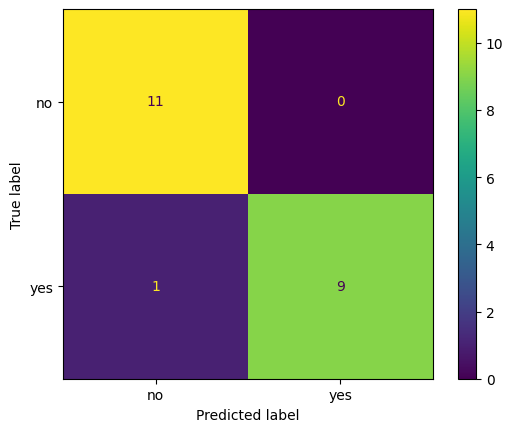

In [ ]:
print("Random Forest Regression")
evaluvate(ans["RandomForestClassifier"],x_test,y_test)

Logistic Regression
              precision    recall  f1-score   support

          no       0.83      0.91      0.87        11
         yes       0.89      0.80      0.84        10

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21



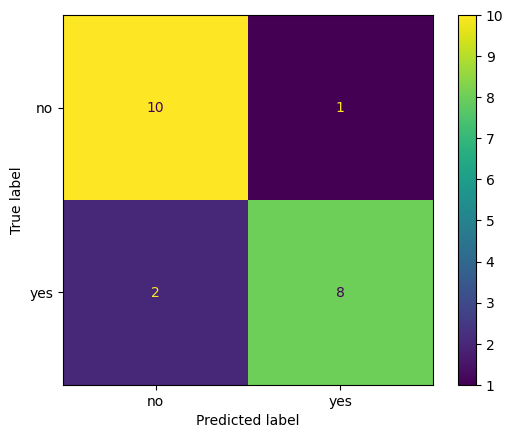

In [ ]:
print("Logistic Regression")
evaluvate(ans["LogisticRegression"],x_test,y_test)

kneighbour
              precision    recall  f1-score   support

          no       0.79      1.00      0.88        11
         yes       1.00      0.70      0.82        10

    accuracy                           0.86        21
   macro avg       0.89      0.85      0.85        21
weighted avg       0.89      0.86      0.85        21



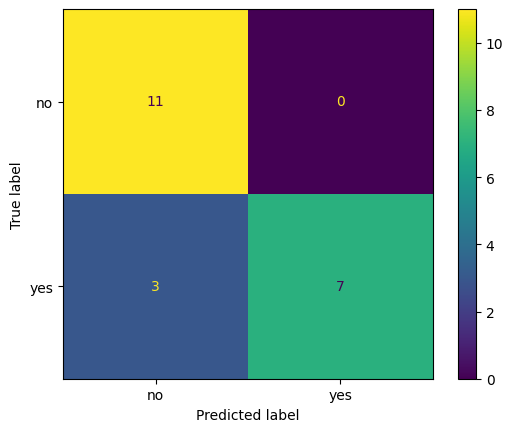

In [ ]:
print("kneighbour")
evaluvate(ans["kNeighbour"],x_test,y_test)

Decision Tree
              precision    recall  f1-score   support

          no       0.83      0.91      0.87        11
         yes       0.89      0.80      0.84        10

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21



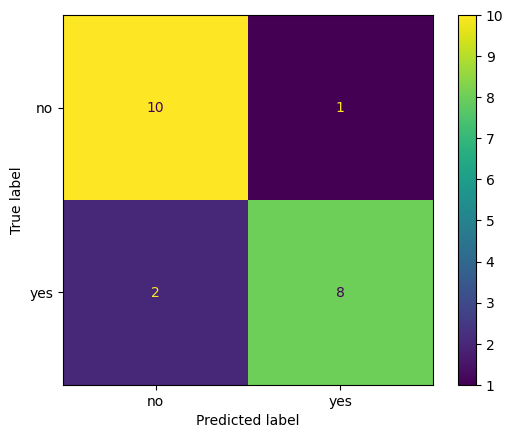

In [ ]:
print("Decision Tree")
evaluvate(ans["dtree"],x_test,y_test)